# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
df = pd.read_csv("data_clustering.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,2
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192,2
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,3
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,2
4,-0.972736,1939,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,16,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [ ]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt_model = Pipeline([
    ("classifier", DecisionTreeClassifier(
        max_depth=8,              
        min_samples_split=20,     
        min_samples_leaf=10,      
        max_features=5,       
        random_state=42
    ))
])

dt_model.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=8, max_features=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [6]:
# Menyimpan Model
# import joblib
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [ ]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
logreg_model = Pipeline([
    ("classifier", LogisticRegression(
        max_iter=1000,   
        solver="lbfgs",       
        multi_class="ovr",    
        random_state=42
    ))
])

logreg_model.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

=== Decision Tree (Test Data) ===
Accuracy : 0.9543
Precision: 0.9552
Recall   : 0.9541
F1-score : 0.9543

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       124
           1       1.00      1.00      1.00       128
           2       0.89      0.95      0.92       125
           3       0.93      0.90      0.91       126

    accuracy                           0.95       503
   macro avg       0.96      0.95      0.95       503
weighted avg       0.96      0.95      0.95       503



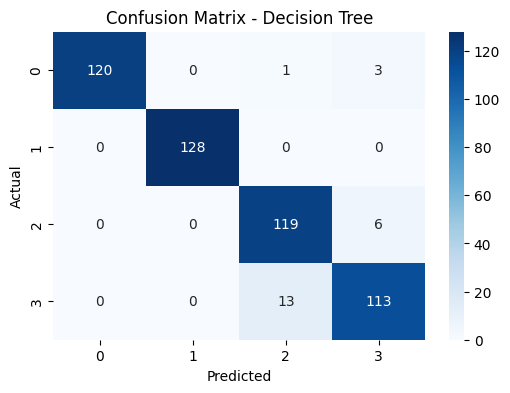

In [8]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
# Evaluasi Decision Tree
y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree (Test Data) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== Logistic Regression (Test Data) ===
Accuracy : 0.9583
Precision: 0.9580
Recall   : 0.9582
F1-score : 0.9581

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      1.00      1.00       128
           2       0.91      0.92      0.92       125
           3       0.93      0.91      0.92       126

    accuracy                           0.96       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.96      0.96      0.96       503



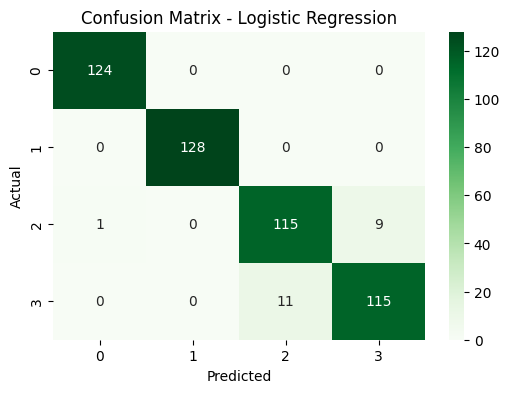

In [9]:
#Evaluasi Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

print("\n=== Logistic Regression (Test Data) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_logreg, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_logreg, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Greens", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
joblib.dump(logreg_model, 'explore_logistic_regression_classification.h5')

['explore_logistic_regression_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],       
    "classifier__penalty": ["l2"],              
    "classifier__solver": ["lbfgs", "saga"]     
}

grid_search = GridSearchCV(
    logreg_model,
    param_grid,
    cv=3,                   
    scoring="f1_macro",     
    n_jobs=-1,
    verbose=1
)

# Latih GridSearch
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_logreg = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


Accuracy : 0.9702
Precision: 0.9700
Recall   : 0.9701
F1-score : 0.9701

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      1.00      1.00       128
           2       0.94      0.94      0.94       125
           3       0.95      0.94      0.94       126

    accuracy                           0.97       503
   macro avg       0.97      0.97      0.97       503
weighted avg       0.97      0.97      0.97       503



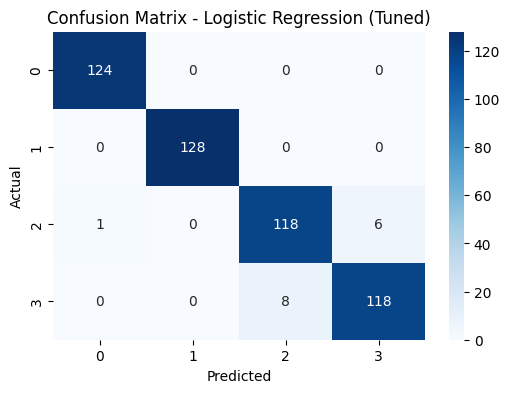

In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
y_pred_best = best_logreg.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='macro'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred_best, average='macro'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred_best, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y), 
            yticklabels=np.unique(y))
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(best_logreg, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code